In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
import math
import os

from scipy import stats
from scipy.stats import skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14,9)})
sns.set(rc={'grid.alpha':0.75})
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [69]:
path_notebook = os.path.abspath('analysis_regression.ipynb')
dirname = os.path.dirname(path_notebook)

Based on the plots in the previous notebook we can make some inferences about the data. Here we will explore them in greater detail.

## Get Data

For the scope of this short research, I will be focusing on Folsom intersections: BoulderCreek, South, and Pine. Though mostly Folsom & BoulderCreek

In [70]:
# 13th & Walnut START DATE: 7/25/2014 - Friday
# df_13th_walnut = pd.read_csv(os.path.join(dirname, 'data_cleaned/thirtienth_walnut.csv'))
# df_13th_walnut['date'] = pd.to_datetime(df_13th_walnut['date'])

# Colorado & 30th START DATE: 8/1/2017 - Tuesday
# df_colorado_30th = pd.read_csv(os.path.join(dirname, 'data_cleaned/colorado_thirtieth.csv'))

# df_colorado_30th.drop(columns=['eb_pedestrains', 'wb_pedestrians',], inplace=True) # Drop Pedestrian data for now
# df_colorado_30th['date'] = pd.to_datetime(df_colorado_30th['date'])

# Folsom & BoulderCreek Path START DATE: 8/9/2011 - Friday
df_folsom_bouldercreek = pd.read_csv(os.path.join(dirname, 'data_cleaned/folsom_bouldercreek.csv'))
df_folsom_bouldercreek['date'] = pd.to_datetime(df_folsom_bouldercreek['date'])

# Folsom & South St. START DATE: 7/20/2015 - Monday
df_folsom_south = pd.read_csv(os.path.join(dirname, 'data_cleaned/folsom_south.csv'))
df_folsom_south['date'] = pd.to_datetime(df_folsom_south['date'])

# Folsom & Pine START DATE: 7/20/2015 - Monday
df_folsom_pine = pd.read_csv(os.path.join(dirname, 'data_cleaned/folsom_pine.csv'))
df_folsom_pine['date'] = pd.to_datetime(df_folsom_pine['date'])

# Baseline & Inca START DATE: 3/3/2016 - Thursday
# df_baseline_inca = pd.read_csv(os.path.join(dirname, 'data_cleaned/baseline_inca.csv'))
# df_baseline_inca['date'] = pd.to_datetime(df_baseline_inca['date'])


## Uncomment to view table structures
# print('13th & Walnut')
# print(df_13th_walnut)
# print('Colorado & 30th')
# print(df_colorado_30th)
# print('Folsom & Boulder Creek Path')
# print(df_folsom_bouldercreek)
# print('Folsom & South St.')
# print(df_folsom_south)
# print('Folsom & Pine')
# print(df_folsom_pine)
# print('Baseline & Inca')
# print(df_baseline_inca)

In [4]:
# Weather Data START DATE: 1/1/2011 - Saturday
df_weather = pd.read_csv(os.path.join(os.path.dirname(path_notebook), 'data_cleaned/weather_daily.csv'))
df_weather['date'] = pd.to_datetime(df_weather['date'])

# -998 is used to represent missing data
df_weather = df_weather[(df_weather.tmin != -998) | (df_weather.tmax != -998)]

# -999.00, -999.0, and -999 represent a trace of precipitation(less than 0.01 inches)
# replace with 0.01
df_weather['precip'].replace(to_replace = -999.00, value = 0.01, inplace=True)
df_weather['snow'].replace(to_replace = -999.0, value = 0.01, inplace=True)
df_weather['snowcover'].replace(to_replace = -999, value = 0.1, inplace=True)

## Uncomment to view table structure
# df_weather

## Slice Data

In [5]:
def reset_index(df):
    df = df.reset_index()
    return(df)

In [6]:
##########
# days_13th_walnut = df_13th_walnut.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_13th_walnut = df_13th_walnut.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
# months_13th_walnut = df_13th_walnut.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# Reset index from date
# days_13th_walnut = reset_index(days_13th_walnut)
# weeks_13th_walnut = reset_index(weeks_13th_walnut)
# months_13th_walnut = reset_index(months_13th_walnut)
##########
# days_colorado_30th = df_colorado_30th.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_colorado_30th = df_colorado_30th.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
# months_colorado_30th = df_colorado_30th.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# days_colorado_30th = reset_index(days_colorado_30th)
# weeks_colorado_30th = reset_index(weeks_colorado_30th)
# months_colorado_30th = reset_index(months_colorado_30th)
##########
days_folsom_bouldercreek = df_folsom_bouldercreek.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_folsom_bouldercreek = df_folsom_bouldercreek.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
# months_folsom_bouldercreek = (df_folsom_bouldercreek.groupby(pd.Grouper(key='date', freq='M'))['total'].sum())

days_folsom_bouldercreek = reset_index(days_folsom_bouldercreek)
# weeks_folsom_bouldercreek = reset_index(weeks_folsom_bouldercreek)
# months_folsom_bouldercreek = reset_index(months_folsom_bouldercreek)
##########
days_folsom_south = df_folsom_south.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_folsom_south = df_folsom_south.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
# months_folsom_south = df_folsom_south.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

days_folsom_south = reset_index(days_folsom_south)
# weeks_folsom_south = reset_index(weeks_folsom_south)
# months_folsom_south = reset_index(months_folsom_south)
##########
days_folsom_pine = df_folsom_pine.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_folsom_pine = df_folsom_pine.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
# months_folsom_pine = df_folsom_pine.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

days_folsom_pine = reset_index(days_folsom_pine)
# weeks_folsom_pine = reset_index(weeks_folsom_pine)
# months_folsom_pine = reset_index(months_folsom_pine)
##########
# days_baseline_inca = df_baseline_inca.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_baseline_inca = df_baseline_inca.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
# months_baseline_inca = df_baseline_inca.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# days_baseline_inca = reset_index(days_baseline_inca)
# weeks_baseline_inca = reset_index(weeks_baseline_inca)
# months_baseline_inca = reset_index(months_baseline_inca)

In [7]:
weather_months = df_weather.groupby(pd.Grouper(key='date', freq='M'))['tmin', 'tmax'].mean()
weather_months = reset_index(weather_months)

weather_months.columns = ['date', 'tmin_mean', 'tmax_mean']
# print(weather_months)

# Exploring Folsom & BoulderCreek Path (2015-2018)

Exploritiory Variable: Bike Count    
Explanitory Variables: Tmax

## Removing Incomplete Data

In [8]:
start_year = 2015
end_year = 2018

# Slice based on start and end year
days_folsom_bouldercreek = days_folsom_bouldercreek[(days_folsom_bouldercreek['date'].dt.year >= start_year)]
days_folsom_bouldercreek = days_folsom_bouldercreek[(days_folsom_bouldercreek['date'].dt.year <= end_year)]

# Remove weather data to line up with bike count data
bouldercreek_weather = df_weather[(df_weather['date'].dt.year >= start_year)]
bouldercreek_weather = bouldercreek_weather[(bouldercreek_weather['date'].dt.year <= end_year)]
bouldercreek_weather.reset_index(inplace=True, drop=True)

In [9]:
# Merge into one Dataframe
df_bouldercreek = days_folsom_bouldercreek.merge(bouldercreek_weather, on='date')
df_bouldercreek['date'] = pd.to_datetime(df_bouldercreek['date'])

In [10]:
# Remove 2013 and 2014 for abnormalalities seen in previous exploration
df_bouldercreek = df_bouldercreek[(df_bouldercreek['date'].dt.year != 2013)]
df_bouldercreek = df_bouldercreek[(df_bouldercreek['date'].dt.year != 2014)]

df_bouldercreek.reset_index(inplace=True, drop=True)

df_bouldercreek.describe()

,total,tmax,tmin,precip,snow,snowcover
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,658.272416,67.160849,38.577687,0.059624,0.243847,0.561875
std,395.093158,17.720378,14.879802,0.194118,1.228292,1.838915
min,0.000000,8.000000,-10.000000,0.000000,0.000000,0.000000
25%,375.000000,54.000000,28.000000,0.000000,0.000000,0.000000
50%,638.000000,68.000000,39.000000,0.000000,0.000000,0.000000
75%,878.000000,82.000000,52.000000,0.010000,0.000000,0.000000
max,2037.000000,100.000000,72.000000,3.110000,16.400000,23.000000


## The Effect of Zero

In [11]:
zero_counts = df_bouldercreek[df_bouldercreek.total == 0].shape[0]
print('Number of zero counts: {}'.format(zero_counts))

Number of zero counts: 41


41 days of zero counts over 5 years does not stand out dramatically(~ 2.25%). I suspect that the number of days with true zero counts is lower than that however. Let's see where this is happening.

In [12]:
print(df_bouldercreek[df_bouldercreek.total == 0])

          date  total  tmax  tmin  precip  snow  snowcover
0   2015-01-01      0    32     6    0.00  0.00        8.0
1   2015-01-02      0    41     6    0.00  0.00        8.0
12  2015-01-13      0    36    22    0.04  0.30        2.0
13  2015-01-14      0    41    20    0.01  0.10        0.1
14  2015-01-15      0    57    23    0.00  0.00        0.1
15  2015-01-16      0    62    29    0.00  0.00        0.1
16  2015-01-17      0    58    37    0.00  0.00        0.1
17  2015-01-18      0    64    34    0.00  0.00        0.1
18  2015-01-19      0    60    37    0.00  0.00        0.0
19  2015-01-20      0    49    24    0.01  0.01        0.0
20  2015-01-21      0    36    25    0.13  2.70        3.0
21  2015-01-22      0    41     7    0.01  0.10        1.0
22  2015-01-23      0    48    20    0.00  0.00        0.1
23  2015-01-24      0    53    26    0.00  0.00        0.1
24  2015-01-25      0    62    27    0.00  0.00        0.0
25  2015-01-26      0    71    33    0.00  0.00        0

As you can see, the count of 0 appears in a predicitable pattern throughout the data. It seems as though the counting mechanism is down at set times each month for some unknown reason. Not only that, it is not uncommon for it to be down for multiple days in a row. Due to the terrible performance of the model prior to removing these, I will move forward by removing all instances of 0. While this may negatively affect the model for days in which weather would accurately deter all bikers, I think it is extremely rare to have 0 bikers in an entire day. Additionally, 2013 and 2014 were removed entirely as they had an extreme number of 0 counts(204).

In [16]:
# Remove days with zero counts
df_bouldercreek_clean = df_bouldercreek[df_bouldercreek.total != 0]

df_bouldercreek_clean.reset_index(inplace=True, drop=True)
df_bouldercreek_clean

,date,total,tmax,tmin,precip,snow,snowcover
0,2015-01-03,47,35,15,0.03,0.70,8.0
1,2015-01-04,978,25,0,0.01,0.40,8.0
2,2015-01-05,813,56,2,0.00,0.00,5.0
3,2015-01-06,799,56,26,0.00,0.00,3.0
4,2015-01-07,841,54,14,0.03,0.60,4.0
...,...,...,...,...,...,...,...
1415,2018-12-27,163,34,18,0.01,0.01,0.0
1416,2018-12-28,123,23,13,0.01,0.01,0.0
1417,2018-12-29,99,37,5,0.01,0.01,0.0
1418,2018-12-30,102,50,21,0.00,0.00,0.0


## Exploring Skew

Text(0, 0.5, 'Frequency')

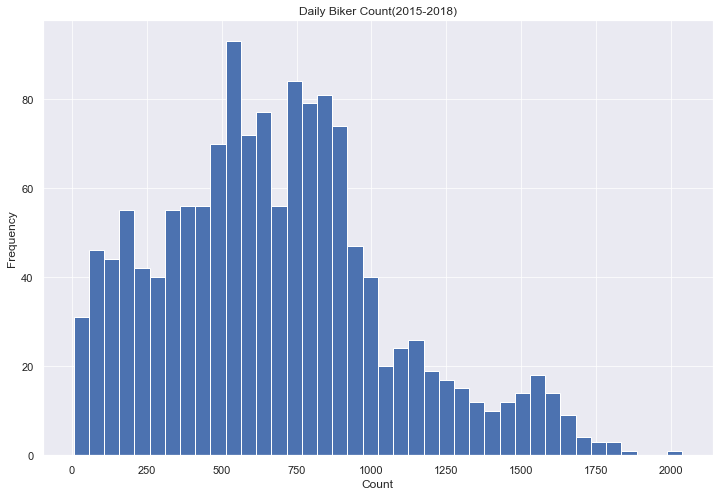

In [18]:
fig, axs = plt.subplots(figsize=(12, 8))
n_bins = 40
x_label = 'Count'
y_label = 'Frequency'
grid_alpha = 0.25

# axs[0].hist(df_bouldercreek['total'], bins=n_bins)
# axs[0].set_title('Daily Biker Count Before 0 Removal (2015-2018)')
# axs[0].set_xlabel(x_label)
# axs[0].set_ylabel(y_label)

axs.hist(df_bouldercreek_clean['total'], bins=n_bins)
axs.set_title('Daily Biker Count(2015-2018)')
axs.set_xlabel(x_label)
axs.set_ylabel(y_label)

Text(0, 0.5, 'Frequency')

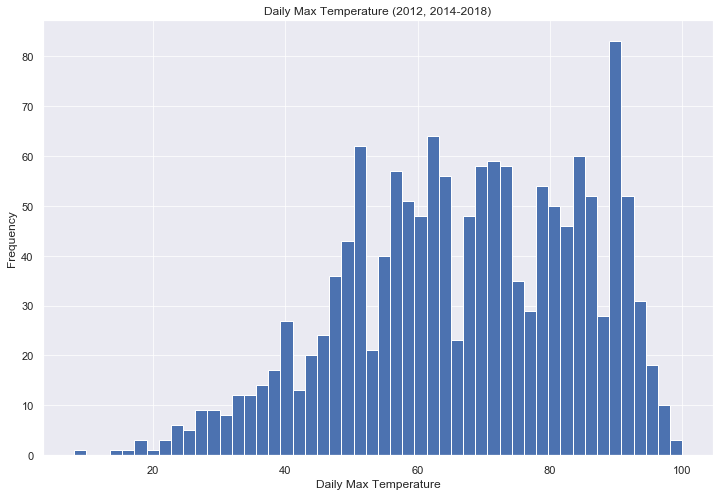

In [20]:
plt.figure(figsize=(12,8))

df_bouldercreek['tmax'].hist(bins=50)

plt.title('Daily Max Temperature (2012, 2014-2018)')
plt.xlabel('Daily Max Temperature')
plt.ylabel('Frequency')

In [21]:
bikers_skew = skew(df_bouldercreek_clean['total'])
tmax_skew = skew(df_bouldercreek_clean['tmax'])

print('Daily biker count Skew: {:.2}'.format(bikers_skew))
print('Daily minimum temperature Skew: {:.2}'.format(tmax_skew))

Daily biker count Skew: 0.56
Daily minimum temperature Skew: -0.39


These data sets will likely need to be normilized

## Outlier Removal

In [22]:
# Filter Outliers
tmp = df_bouldercreek_clean[(np.abs(stats.zscore(df_bouldercreek_clean['total'])) < 3)]

# What was removed
removed = df_bouldercreek_clean.index.difference(tmp.index)

for i in removed:
    print(df_bouldercreek_clean.loc[i])
    
df_bouldercreek_clean = tmp
df_bouldercreek_clean.reset_index(inplace=True, drop=True)

df_bouldercreek_clean

date         2015-09-16 00:00:00
total                       2037
tmax                          88
tmin                          54
precip                         0
snow                           0
snowcover                      0
Name: 222, dtype: object
date         2015-10-09 00:00:00
total                       1837
tmax                          73
tmin                          43
precip                         0
snow                           0
snowcover                      0
Name: 244, dtype: object


,date,total,tmax,tmin,precip,snow,snowcover
0,2015-01-03,47,35,15,0.03,0.70,8.0
1,2015-01-04,978,25,0,0.01,0.40,8.0
2,2015-01-05,813,56,2,0.00,0.00,5.0
3,2015-01-06,799,56,26,0.00,0.00,3.0
4,2015-01-07,841,54,14,0.03,0.60,4.0
...,...,...,...,...,...,...,...
1413,2018-12-27,163,34,18,0.01,0.01,0.0
1414,2018-12-28,123,23,13,0.01,0.01,0.0
1415,2018-12-29,99,37,5,0.01,0.01,0.0
1416,2018-12-30,102,50,21,0.00,0.00,0.0


Since only 2 points were detected outside of 3 standard deviations I will go ahead and remove them. This should have a positive affect on the skew of the data. After some searching I was not able to find any sort of explanation for these spikes(i.e. bike to work days.) These days may be interesting to look at in further explorations.

### Updating Skew

In [23]:
bikers_skew2 = skew(df_bouldercreek_clean['total'])

print('Daily biker count Skew: {:.2}'.format(bikers_skew2))

Daily biker count Skew: 0.53


As you can see these 2 points had a significant impact on the skew(0.05 decrease) of the data and thus I will leave them out. The skew is still high enough to warrant adjustments

## Adding Day of the Week as a Feature

In [24]:
# 0-Monday, 1-Tuesday, 2-Wednesday, 3-Thursday, 4-Friday, 5-Saturday, 6-Sunday
df_bouldercreek_clean['dayofweek'] = df_bouldercreek_clean['date'].dt.dayofweek

C:\Users\munoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Counts by day of the week (2012, 2014-2018)
df_bouldercreek_clean.groupby(['dayofweek'])['total'].sum()

dayofweek
0    149195
1    149874
2    155613
3    152526
4    138953
5    104920
6    106781
Name: total, dtype: int64

The count of bikes drops >25% on saturday and sunday, suggesting that many people are work commuters only

## Exploring Correlation

In [26]:
df_bouldercreek_clean.corr()

,total,tmax,tmin,precip,snow,snowcover,dayofweek
total,1.000000,0.392215,0.358899,-0.170514,-0.205226,-0.249324,-0.222049
tmax,0.392215,1.000000,0.890617,-0.197196,-0.319635,-0.476324,0.004508
tmin,0.358899,0.890617,1.000000,-0.044057,-0.252350,-0.461541,-0.018285
precip,-0.170514,-0.197196,-0.044057,1.000000,0.541321,0.268217,-0.013865
snow,-0.205226,-0.319635,-0.252350,0.541321,1.000000,0.633644,0.010305
snowcover,-0.249324,-0.476324,-0.461541,0.268217,0.633644,1.000000,0.003632
dayofweek,-0.222049,0.004508,-0.018285,-0.013865,0.010305,0.003632,1.000000


The table shows there is some correlation between the total count and tmax/tmin. tmax and tmin are heavily correlated, as such we will focus on tmax. precip, snow, and snowcover have less correlation that I expected though snowcover could be significant. The day of the week has a fairly strong negative correlation due to the less activity on saturday and sunday(5 and 6)

## Standardization

(array([18., 28., 39., 30., 37., 34., 29., 27., 36., 41., 39., 36., 46.,
        50., 68., 55., 54., 47., 51., 43., 68., 52., 62., 51., 57., 38.,
        33., 28., 15., 12., 20., 20., 11., 17., 10., 10., 11.,  8.,  6.,
         9.,  8., 11., 14.,  8., 12.,  8.,  3.,  3.,  1.,  4.]),
 array([-1.75471807, -1.6601025 , -1.56548694, -1.47087137, -1.3762558 ,
        -1.28164023, -1.18702467, -1.0924091 , -0.99779353, -0.90317797,
        -0.8085624 , -0.71394683, -0.61933126, -0.5247157 , -0.43010013,
        -0.33548456, -0.240869  , -0.14625343, -0.05163786,  0.0429777 ,
         0.13759327,  0.23220884,  0.32682441,  0.42143997,  0.51605554,
         0.61067111,  0.70528667,  0.79990224,  0.89451781,  0.98913337,
         1.08374894,  1.17836451,  1.27298008,  1.36759564,  1.46221121,
         1.55682678,  1.65144234,  1.74605791,  1.84067348,  1.93528905,
         2.02990461,  2.12452018,  2.21913575,  2.31375131,  2.40836688,
         2.50298245,  2.59759801,  2.69221358,  2.78682915,

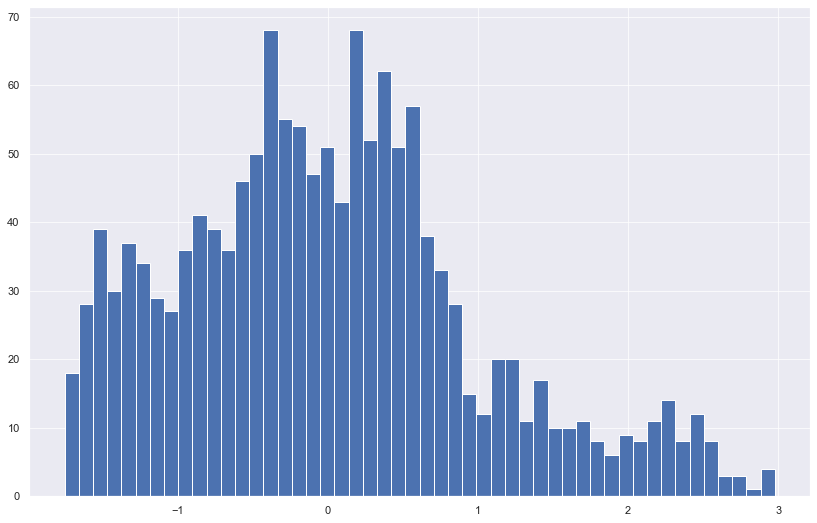

In [27]:
from sklearn.preprocessing import StandardScaler

names = df_bouldercreek_clean.columns

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_bouldercreek_clean[['total']])
plt.hist(scaled_df, bins=50)

In [28]:
standard_skew = skew(scaled_df)
print('Standardized daily biker count Skew: {}'.format(standard_skew))

Standardized daily biker count Skew: [0.53352092]


## Linear Regression Modeling

In [29]:
# Input (X) and output (Y) variables
X = df_bouldercreek_clean[['tmax']]
Y = df_bouldercreek_clean[['total']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [30]:
model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
intercept = model_LR.intercept_[0]
coefficient = model_LR.coef_[0][0]

print('The intercept for the model is: {:2}'.format(intercept))
print('The coefficient for the model is: {:.2}'.format(coefficient))

The intercept for the model is: 107.3192407183401
The coefficient for the model is: 8.5


### Predictions

In [32]:
y_predict = model_LR.predict(X_test)

y_predict[:10]

array([[337.19174648],
       [422.32971157],
       [601.11943828],
       [447.8711011 ],
       [609.63323478],
       [490.44008365],
       [456.38489761],
       [771.39536847],
       [337.19174648],
       [660.71601384]])

### Evaluation

In [33]:
X2 = sm.add_constant(X)

# OLS Model for model evaluation
model_OLS = sm.OLS(Y, X2)

est = model_OLS.fit()

C:\Users\munoz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### CI

In [34]:
# 95% Confidence Interval
est.conf_int()

,0,1
const,31.534726,176.042266
tmax,7.443936,9.517701


### Hypothesis Testing

- **Null Hypothesis:** There is no relation between the daily maximum temperature and the count of bikers.  
- **Alt Hypothesis:** There is a relationship between daily maximum temperature and the count of bikers.

In [35]:
est.pvalues

const    4.902788e-03
tmax     2.345302e-53
dtype: float64

With the tmin p-value being much less than 0, we can safely reject the null hypothesis and say with confidence that there is a relation between minimum daily temperature and bike count.

### Model Fittness

In [36]:
# Calculate mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print('MAE: {}'.format(model_mae))
print('MSE: {}'.format(model_mse))
print('RMSE: {}'.format(model_rmse))

MAE: 275.1557510905626
MSE: 122545.04863265117
RMSE: 350.0643492740316


MSE: 162,667.17 -> 120,803.74  
RMSE: 403.32 -> 347.57  
After removal of zero count days and 3 outliers.

In [37]:
model_r2 = r2_score(y_test, y_predict)
print('R2: {:.2}'.format(model_r2))

R2: 0.15


.05 -> .15  
After removal of 0's and 3 outliers

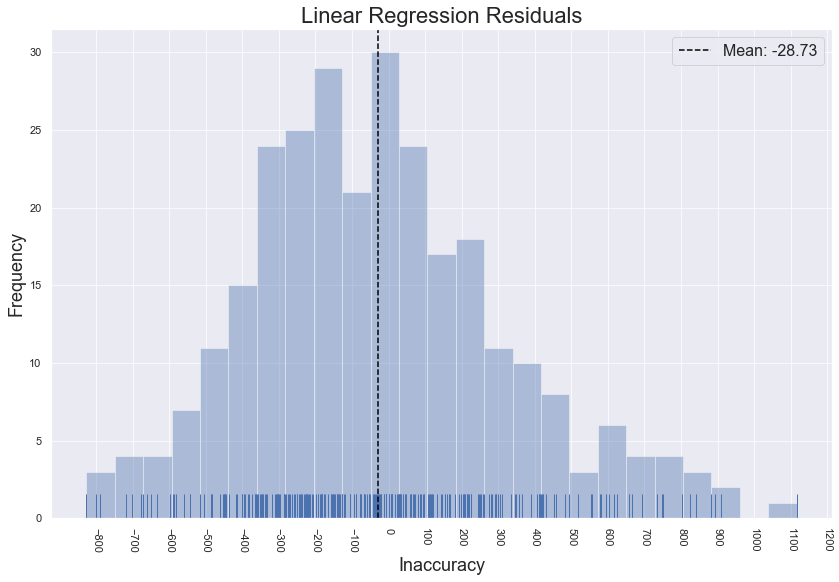

In [41]:
residuals = y_test-y_predict

fig = sns.distplot(residuals, bins=25, kde=False, rug=True)

fig.axvline(x=residuals['total'].mean(), color='black', linestyle='--', label='Mean: {:.4}'.format(residuals['total'].mean()))
std = np.std(residuals['total'])
# fig.axvline(x=std, color='red', linestyle='--', label='1 STD')
# fig.axvline(x=-std, color='red', linestyle='--')

x_ticks = np.arange(-800, 1300, step=100)
plt.xticks(x_ticks, rotation=270)

plt.title('Linear Regression Residuals', fontsize=22)
plt.xlabel('Inaccuracy', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc='upper right', fontsize=16)

The model is quite inaccurate...

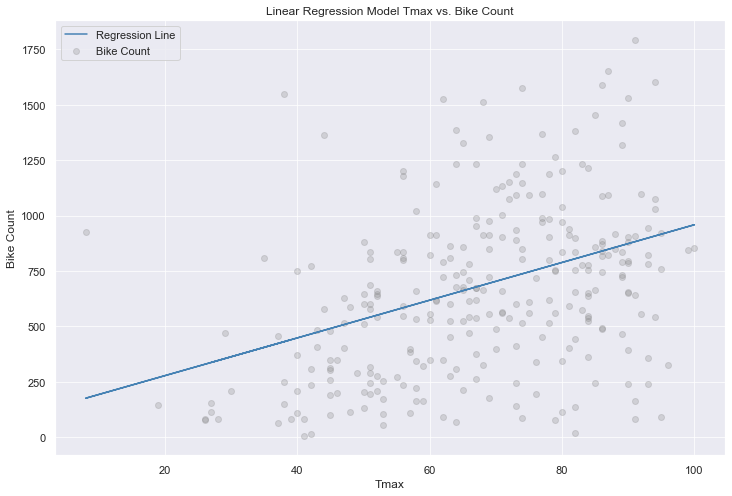

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(X_test, y_test, color='gray', alpha=0.25, label='Bike Count')
plt.plot(X_test, y_predict, color='steelblue', label='Regression Line')

plt.title('Linear Regression Model Tmax vs. Bike Count')
plt.xlabel('Tmax')
plt.ylabel('Bike Count')
plt.legend()
plt.show()

Clearly Linear Regression is no ideal, MLR may prove more successfull, however, the seasonal change in bike frequency suggests that looking at time series may prove more beneficial.

## Multiple Linear Regression

In [43]:
# Define input (X) and output (Y)
# Features: date, total, tmax, tmin, precip, snow, snowcover, weekday
X1 = df_bouldercreek_clean.drop(['date', 'total', 'tmin', 'precip', 'snow', 'snowcover'], axis=1)
Y1 = df_bouldercreek_clean[['total']]

# Split dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.20, random_state = 1)

model_MLR = LinearRegression()

model_MLR.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
intercept = model_MLR.intercept_[0]
coefficient = model_MLR.coef_[0][0]

print('The intercept for the model is: {:2}'.format(intercept))

for coef in zip(X.columns, model_MLR.coef_[0]):
    print('The coefficient for {} is: {}'.format(coef[0], coef[1]))

The intercept for the model is: 228.12121130122335
The coefficient for tmax is: 8.627068527624031


In [45]:
y_predict1 = model_MLR.predict(X_test1)

y_predict1[:5]

array([[334.36583808],
       [420.63652335],
       [517.34748012],
       [446.51772894],
       [483.74580749]])

In [46]:
X2 = sm.add_constant(X1)

# OLS Model for model evaluation
model_OLS = sm.OLS(Y1, X2)

est = model_OLS.fit()

C:\Users\munoz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
est.conf_int()

,0,1
const,155.661584,305.454897
tmax,7.496549,9.508724
dayofweek,-51.512117,-33.781079


In [48]:
# Calculate mean absolute error
model_mae = mean_absolute_error(y_test1, y_predict1)

# Calculate the mean squared error
model_mse = mean_squared_error(y_test1, y_predict1)

# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print('MAE: {}'.format(model_mae))
print('MSE: {}'.format(model_mse))
print('RMSE: {}'.format(model_rmse))

MAE: 261.7027046961581
MSE: 114813.79490176229
RMSE: 338.8418434930407


In [49]:
model_r2 = r2_score(y_test1, y_predict1)
print('R2: {}'.format(model_r2))

R2: 0.19896890170539794


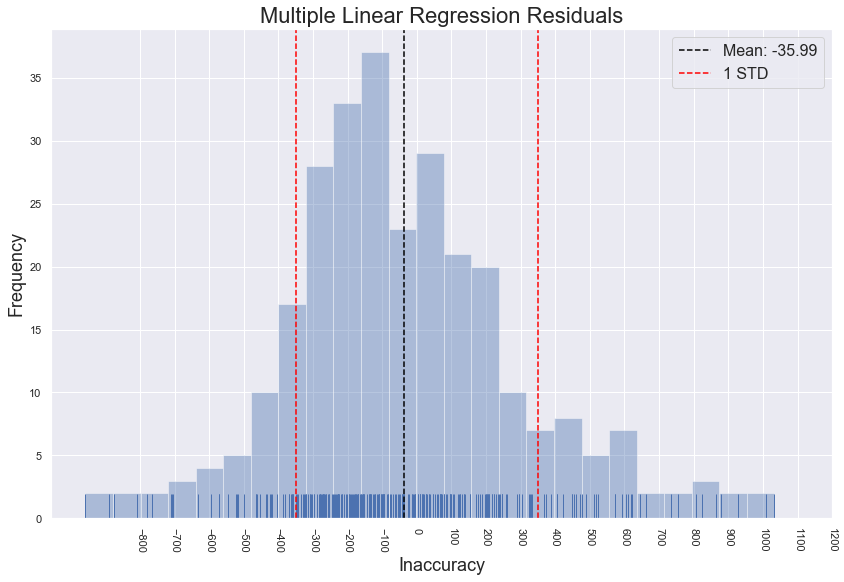

In [50]:
residuals1 = y_test1-y_predict1

fig = sns.distplot(residuals1, bins=25, kde=False, rug=True)

fig.axvline(x=residuals1['total'].mean(), color='black', linestyle='--', label='Mean: {:.4}'.format(residuals1['total'].mean()))
std = np.std(residuals['total'])
fig.axvline(x=std, color='red', linestyle='--', label='1 STD')
fig.axvline(x=-std, color='red', linestyle='--')

x_ticks = np.arange(-800, 1300, step=100)
plt.xticks(x_ticks, rotation=270)

plt.grid(alpha=1)

plt.title('Multiple Linear Regression Residuals', fontsize=22)
plt.xlabel('Inaccuracy', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc='upper right', fontsize=16)

# Exploring Folsom & South St.

In [51]:
start_year = 2016
end_year = 2018

# Slice based on start and end year
days_folsom_south = days_folsom_south[(days_folsom_south['date'].dt.year >= start_year)]
days_folsom_south = days_folsom_south[(days_folsom_south['date'].dt.year <= end_year)]

# Remove weather data to line up with bike count data
folsom_south_weather = df_weather[(df_weather['date'].dt.year >= start_year)]
folsom_south_weather = folsom_south_weather[(folsom_south_weather['date'].dt.year <= end_year)]
folsom_south_weather.reset_index(inplace=True, drop=True)

In [52]:
# Merge count and weather data
df_south = days_folsom_south.merge(folsom_south_weather, on='date')

In [53]:
# Add day of the week
# 0-Monday, 1-Tuesday, 2-Wednesday, 3-Thursday, 4-Friday, 5-Saturday, 6-Sunday
df_south['weekday'] = df_south['date'].dt.dayofweek
df_south.groupby(df_south['weekday'])['total'].sum()

weekday
0    104902
1    103012
2    112401
3    110185
4    101576
5     80674
6     77017
Name: total, dtype: int64

In [54]:
df_south

,date,total,tmax,tmin,precip,snow,snowcover,weekday
0,2016-01-01,80,39,3,0.00,0.00,3.0,4
1,2016-01-02,196,46,15,0.00,0.00,3.0,5
2,2016-01-03,726,50,19,0.00,0.00,3.0,6
3,2016-01-04,627,45,21,0.00,0.00,2.0,0
4,2016-01-05,142,51,23,0.00,0.00,2.0,1
...,...,...,...,...,...,...,...,...
1091,2018-12-27,197,34,18,0.01,0.01,0.0,3
1092,2018-12-28,120,23,13,0.01,0.01,0.0,4
1093,2018-12-29,114,37,5,0.01,0.01,0.0,5
1094,2018-12-30,178,50,21,0.00,0.00,0.0,6


## The Effect of Zero's

In [55]:
zero_count = df_south[df_south['total'] == 0].shape[0]

print('Number of days with zero bikers: {}'.format(zero_count))

Number of days with zero bikers: 0


The dataset is free of zero counts which potentially indicates better reporting than at Bouldercreek.

## Outliers

In [56]:
# Filter Outliers
tmp = df_south[(np.abs(stats.zscore(df_south['total'])) < 3)]

# What was removed
removed = df_south.index.difference(tmp.index)

for i in removed:
    print(df_south.loc[i])
    
df_south_clean = tmp
df_south_clean.reset_index(inplace=True, drop=True)
df_south_clean.set_index('date', inplace=True)

df_south_clean

date         2016-11-09 00:00:00
total                       1806
tmax                          72
tmin                          32
precip                         0
snow                           0
snowcover                      0
weekday                        2
Name: 313, dtype: object
date         2017-10-09 00:00:00
total                       1719
tmax                          52
tmin                          31
precip                      0.92
snow                           6
snowcover                      4
weekday                        0
Name: 647, dtype: object
date         2018-09-09 00:00:00
total                       1768
tmax                          87
tmin                          54
precip                      0.01
snow                           0
snowcover                      0
weekday                        6
Name: 982, dtype: object


,total,tmax,tmin,precip,snow,snowcover,weekday
date,,,,,,,
2016-01-01,80,39,3,0.00,0.00,3.0,4
2016-01-02,196,46,15,0.00,0.00,3.0,5
2016-01-03,726,50,19,0.00,0.00,3.0,6
2016-01-04,627,45,21,0.00,0.00,2.0,0
2016-01-05,142,51,23,0.00,0.00,2.0,1
...,...,...,...,...,...,...,...
2018-12-27,197,34,18,0.01,0.01,0.0,3
2018-12-28,120,23,13,0.01,0.01,0.0,4
2018-12-29,114,37,5,0.01,0.01,0.0,5


## Looking For Trends

In [57]:
## Correlation
df_south_clean.corr()

,total,tmax,tmin,precip,snow,snowcover,weekday
total,1.000000,0.426521,0.381367,-0.204371,-0.215515,-0.232430,-0.209900
tmax,0.426521,1.000000,0.894375,-0.166197,-0.285434,-0.444921,0.001000
tmin,0.381367,0.894375,1.000000,-0.038935,-0.223760,-0.425936,-0.015196
precip,-0.204371,-0.166197,-0.038935,1.000000,0.606519,0.377311,-0.013189
snow,-0.215515,-0.285434,-0.223760,0.606519,1.000000,0.703209,0.019901
snowcover,-0.232430,-0.444921,-0.425936,0.377311,0.703209,1.000000,0.024489
weekday,-0.209900,0.001000,-0.015196,-0.013189,0.019901,0.024489,1.000000


# Folsom & Boulder Creek MLR

In [58]:
scaler = preprocessing.StandardScaler()

scaled_df_bouldercreek = df_bouldercreek_clean.drop(['tmin', 'snowcover', 'snow', 'precip', 'date'], axis=1)

scaled_df_bouldercreek = scaler.fit_transform(scaled_df_bouldercreek)
scaled_df_bouldercreek = pd.DataFrame(scaled_df_bouldercreek, columns=(['total', 'tmax', 'dayofweek']))

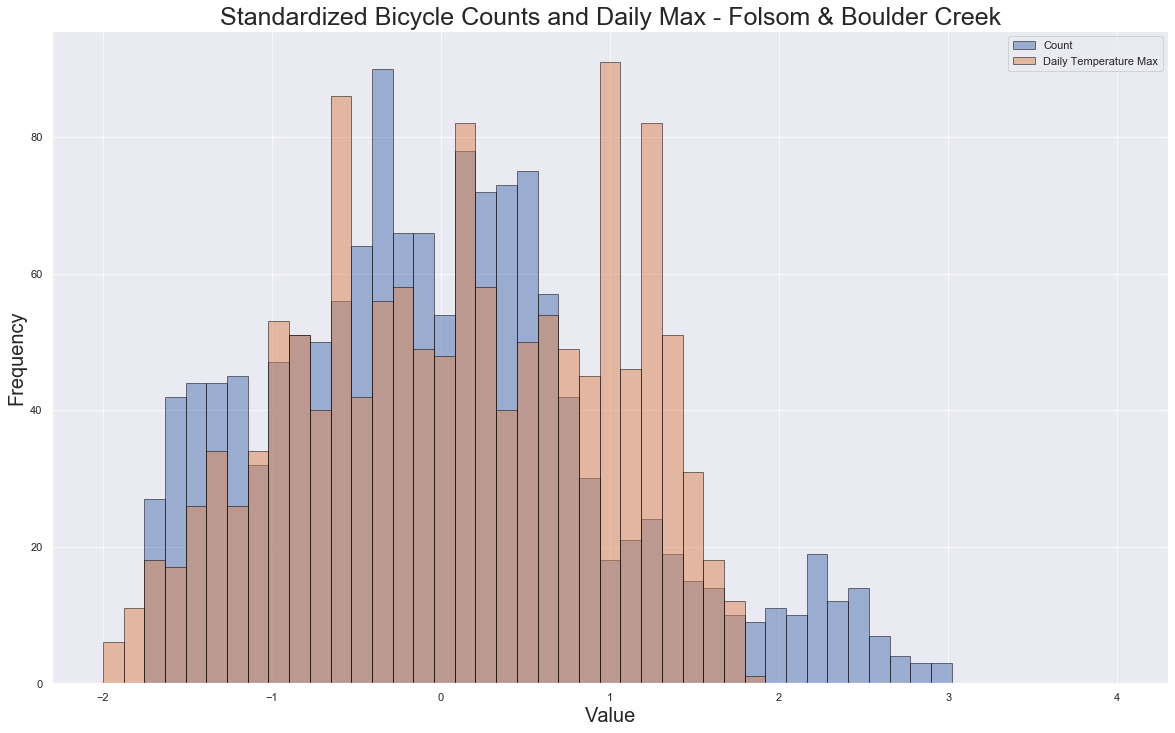

In [59]:
bins = np.linspace(-2, 4, 50)
fontsize = 20
titlesize = 25

plt.figure(figsize=(20,12))

plt.title('Standardized Bicycle Counts and Daily Max - Folsom & Boulder Creek', fontsize=titlesize)
plt.xlabel('Value', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)

plt.hist(scaled_df_bouldercreek['total'], bins, alpha=0.5, edgecolor='black', label='Count')
plt.hist(scaled_df_bouldercreek['tmax'], bins, alpha=0.5, edgecolor='black', label='Daily Temperature Max')
# plt.hist(scaled_df_south['dayofweek'], bins, alpha=0.5, edgecolor='black', label='Day of Week')

plt.legend(loc='upper right')
plt.show()

In [60]:
bike_skew = skew(scaled_df_bouldercreek['total'])
temp_skew = skew(scaled_df_bouldercreek['tmax'])
print(bike_skew, temp_skew)

0.5335209244417082 -0.3878455980825411


## Modeling

In [61]:
# Input and output of the model (X, Y)
X = df_bouldercreek_clean[['tmax', 'dayofweek']]
Y = df_bouldercreek_clean[['total']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [62]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

intercept = model_LR.intercept_[0]
coefficient = model_LR.coef_[0][0]

print('The intercept for the model is: {:2}'.format(intercept))
print('The coefficient for the model is: {:.2}'.format(coefficient))

The intercept for the model is: 228.12121130122335
The coefficient for the model is: 8.6


In [63]:
y_predict = model_LR.predict(X_test)

y_predict[:5]

array([[334.36583808],
       [420.63652335],
       [517.34748012],
       [446.51772894],
       [483.74580749]])

In [64]:
# Calculate mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print('MAE: {}'.format(model_mae))
print('MSE: {}'.format(model_mse))
print('RMSE: {}'.format(model_rmse))

MAE: 261.7027046961581
MSE: 114813.79490176229
RMSE: 338.8418434930407


In [65]:
model_r2 = r2_score(y_test, y_predict)
print('R2: {}'.format(model_r2))

R2: 0.19896890170539794


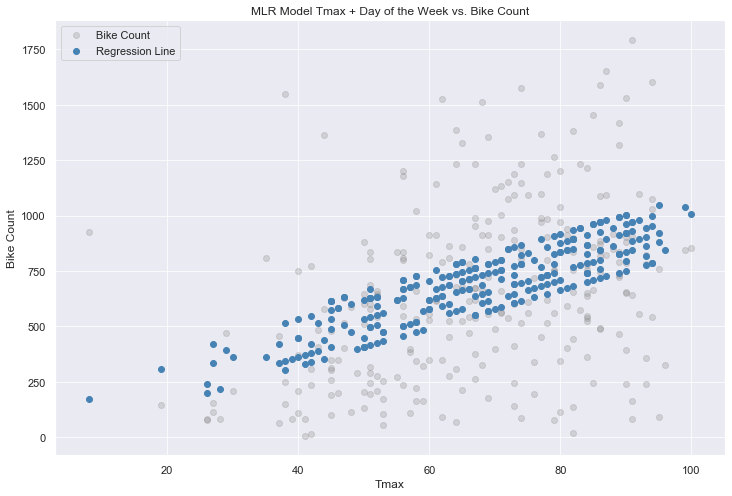

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X_test['tmax'], y_test, color='gray', alpha=0.25, label='Bike Count')
plt.scatter(X_test['tmax'], y_predict, color='steelblue', label='Regression Line')

plt.title('MLR Model Tmax + Day of the Week vs. Bike Count')
plt.xlabel('Tmax')
plt.ylabel('Bike Count')
plt.legend()
plt.show()

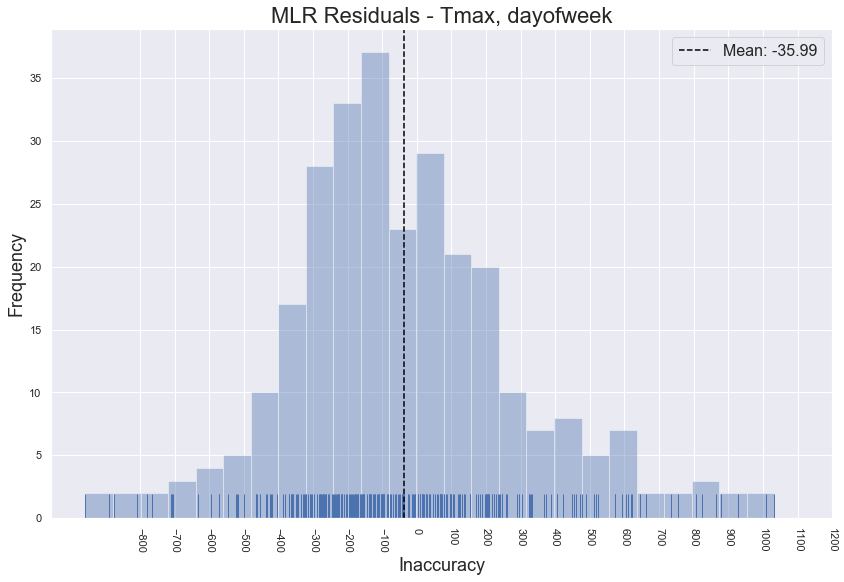

In [67]:
residuals = y_test-y_predict

fig = sns.distplot(residuals, bins=25, kde=False, rug=True)

fig.axvline(x=residuals['total'].mean(), color='black', linestyle='--', label='Mean: {:.4}'.format(residuals['total'].mean()))
std = np.std(residuals['total'])
# fig.axvline(x=std, color='red', linestyle='--', label='1 STD')
# fig.axvline(x=-std, color='red', linestyle='--')

x_ticks = np.arange(-800, 1300, step=100)
plt.xticks(x_ticks, rotation=270)

plt.grid(alpha=1)

plt.title('MLR Residuals - Tmax, dayofweek', fontsize=22)
plt.xlabel('Inaccuracy', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(loc='upper right', fontsize=16)